In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [63]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv')
print(data.columns)


Index(['patKey', 'patid', 'rhcId', 'RHCDate', 'Sex', 'Height', 'Weight',
       'Birthday', 'CO_td', 'CO_fick', 'PCW', 'PCWa', 'PCWv', 'PAs', 'PAd',
       'RVs', 'RVmin', 'RVd', 'RAa', 'RAv', 'RAm', 'LVs', 'LVd', 'LVmin',
       'SAs', 'SAd', 'HR_rhc', 'HR_vitals', 'HR_vitals_std', 'NIBPs_vitals',
       'NIBPs_vitals_std', 'NIBPd_vitals', 'NIBPd_vitals_std', 'As', 'Ad',
       'tteId', 'TTEDate', 'LVIDd', 'LVIDs', 'HR_tte', 'LVEF_tte', 'EA',
       'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr', 'MVmg', 'TVr',
       'TVmg', 'PVr', 'PVpg', 'AVr_str', 'MVr_str', 'TVr_str', 'PVr_str',
       'patkey', 'RV Dysfunction'],
      dtype='object')


/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_8501/454378334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='patid',y='RV Dysfunction',data=data,palette='winter')


<Axes: xlabel='patid', ylabel='RV Dysfunction'>

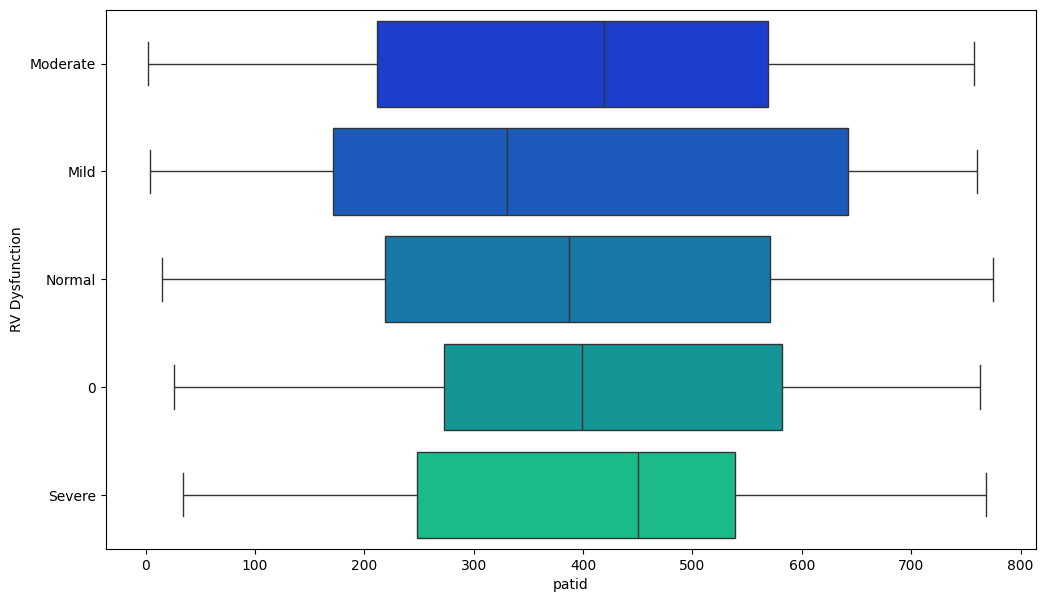

In [64]:
data = data.dropna(subset=['Birthday'])
plt.figure(figsize=(12, 7))
sns.boxplot(x='patid',y='RV Dysfunction',data=data,palette='winter')

In [65]:
# Impute missing values for all numeric columns
X = data.select_dtypes(exclude=['object', 'string'])
Y = data['RV Dysfunction']
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent' as needed
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame if needed
X = pd.DataFrame(X_imputed, columns=X.columns)

In [66]:
# Encode non-numeric columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")


Data preprocessing completed!


In [67]:
# Initialize the model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [68]:
# Predict on the test data
y_pred = log_reg.predict(X_test)

In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.3368421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
        Mild       0.33      0.31      0.32        29
    Moderate       0.27      0.29      0.28        24
      Normal       0.45      0.62      0.53        24
      Severe       0.20      0.08      0.12        12

    accuracy                           0.34        95
   macro avg       0.25      0.26      0.25        95
weighted avg       0.31      0.34      0.32        95


Confusion Matrix:
 [[ 0  4  0  2  0]
 [ 0  9 12  7  1]
 [ 2  6  7  6  3]
 [ 1  4  4 15  0]
 [ 1  4  3  3  1]]


In [70]:
# Extract feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]  # Use for binary classification or split per class for multi-class
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n", coefficients)


Feature Importance:
              Feature  Coefficient
17               RAm     0.660900
29  NIBPd_vitals_std     0.651563
44               MVr     0.630989
24         HR_vitals     0.496693
26      NIBPs_vitals     0.451351
37                EA     0.403214
13             RVmin     0.357645
10               PAs     0.342199
38              IVSd     0.336477
22               SAd     0.260255
12               RVs     0.258999
46               TVr     0.232407
32             tteId     0.189441
5              CO_td     0.171821
21               SAs     0.170173
3             Height     0.094159
2                Sex     0.086214
16               RAv     0.081117
1              rhcId     0.051023
34             LVIDs     0.035367
14               RVd     0.024222
19               LVd     0.010891
20             LVmin     0.007882
47              TVmg    -0.002007
9               PCWv    -0.011604
49              PVpg    -0.019539
41               VLA    -0.021353
18               LVs    -0

In [71]:
Y_filtered = Y[Y != 0]
Y_grouped = Y_filtered.replace({
    'Moderate': 'High Dysfunction',
    'Severe': 'High Dysfunction',
    'Normal': 'Low Dysfunction',
    'Mild': 'Low Dysfunction'
})
print(Y_grouped.value_counts())

RV Dysfunction
Low Dysfunction     273
High Dysfunction    178
0                    21
Name: count, dtype: int64


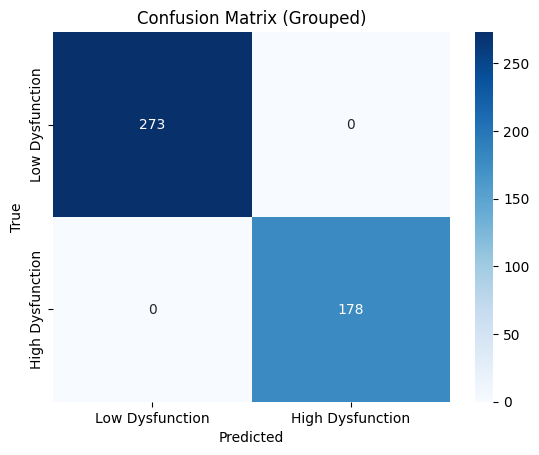

In [72]:
conf_matrix = confusion_matrix(Y_grouped, Y_grouped, labels=['Low Dysfunction', 'High Dysfunction'])

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Dysfunction', 'High Dysfunction'], 
            yticklabels=['Low Dysfunction', 'High Dysfunction'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Grouped)')
plt.show()

In [73]:
# Impute missing values for all numeric columns
X = data.select_dtypes(exclude=['object', 'string'])
Y = data['RV Dysfunction']
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent' as needed
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame if needed
X = pd.DataFrame(X_imputed, columns=X.columns)

In [74]:
# Convert confusion matrix to a DataFrame for better readability
labels = ['Low Dysfunction', 'High Dysfunction']
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(conf_matrix_df)

                  Low Dysfunction  High Dysfunction
Low Dysfunction               273                 0
High Dysfunction                0               178


In [ ]:
# Convert confusion matrix to a DataFrame for better readability
labels = ['Low Dysfunction', 'High Dysfunction']
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(conf_matrix_df)

                  Low Dysfunction  High Dysfunction
Low Dysfunction               273                 0
High Dysfunction                0               178


/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_8501/2326119649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefficients_filtered['Importance'] = coefficients_filtered['Coefficient'].abs()


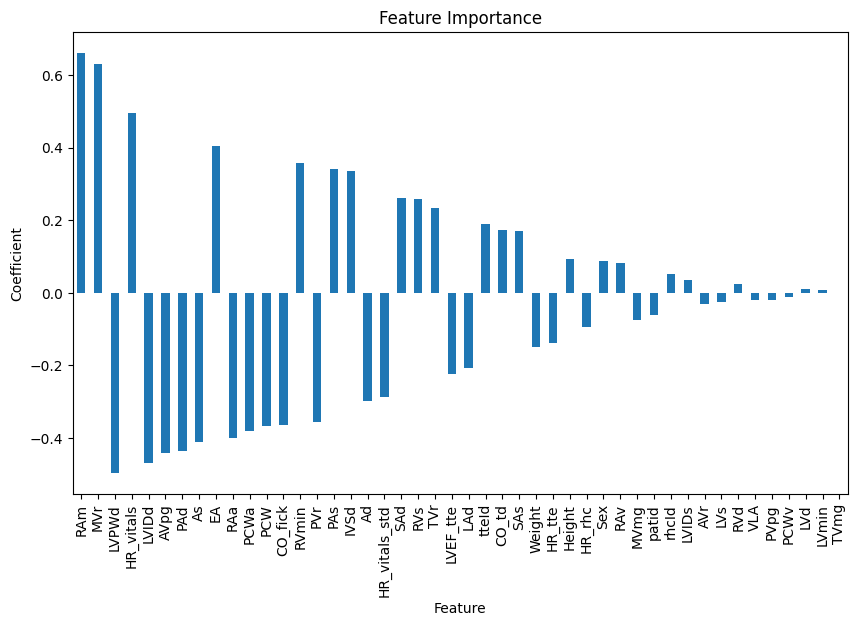

In [75]:
# Step 1: Filter out features with '_str' in their names
coefficients_filtered = coefficients[~coefficients['Feature'].str.contains('_str')]
coefficients_filtered = coefficients[~coefficients['Feature'].str.contains('NIBP')]

# Step 2: Sort and plot the remaining features by importance
coefficients_filtered['Importance'] = coefficients_filtered['Coefficient'].abs()
coefficients_filtered = coefficients_filtered.sort_values(by='Importance', ascending=False)

# Step 3: Plot the filtered coefficients
coefficients_filtered.plot(
    kind='bar',
    x='Feature',
    y='Coefficient',
    legend=False,
    figsize=(10, 6)
)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()
